In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [2]:
#User-supplied
obsfile = '/glade/p/work/manab/fcast/data/dly/obsflow.dly.HHDW1.csv'
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/testdeleteconcat/paramtest7468.nc'
routefile = '/glade/p/work/manab/SHARP/PNW_route/output/paramtest21.nc'

hid = 17007511  #HRU ID to be plotted
sid = 17003601  #Reach ID to be plotted
pltwidth = 15
pltheight = 5
starttime1 = '2015-10-01'
endtime1 = '2016-09-01'

In [3]:
# Observed streamflow
o = pd.read_csv(obsfile)
o.rename(columns = {'Year':'time', 'cfs': 'flow'}, inplace=True)

o['flow'] = o['flow']*0.028316847 #Convert to CMS
o['time'] = pd.to_datetime(o['time'])  #convert to datetime format
o.loc[o['flow'] < 0 , 'flow'] = np.nan
o.fillna(method='ffill', limit=10)

o = o.set_index(['time'])
obs = o.to_xarray()

In [4]:
#Unit conversion
out = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')
out

<xarray.Dataset>
Dimensions:                 (hru: 1, midToto: 8, time: 19248)
Coordinates:
  * time                    (time) datetime64[ns] 2010-06-01 ...
  * hru                     (hru) int64 17007511
Dimensions without coordinates: midToto
Data variables:
    mLayerVolFracLiq        (time, midToto, hru) float64 ...
    pptrate                 (time, hru) float64 ...
    nSnow                   (time, hru) int32 ...
    nSoil                   (time, hru) int32 ...
    nLayers                 (time, hru) int32 ...
    scalarSWE               (time, hru) float64 ...
    scalarAquiferStorage    (time, hru) float64 ...
    scalarTotalSoilWat      (time, hru) float64 ...
    scalarRainPlusMelt      (time, hru) float64 ...
    scalarAquiferRecharge   (time, hru) float64 ...
    scalarAquiferTranspire  (time, hru) float64 ...
    scalarAquiferBaseflow   (time, hru) float64 ...
    averageInstantRunoff    (time, hru) float64 ...
Attributes:
    summaVersion:     v2.0.0
    buildTime:    

In [5]:
out['pptrate'] = out['pptrate']*3600      #kg m-2 s-1 -> mm/hr
out['averageInstantRunoff'] = out['averageInstantRunoff']*3600000  #m/s to mm/h
out['scalarAquiferBaseflow'] = out['scalarAquiferBaseflow']*3600000  #m/s to mm/h
out['scalarRainPlusMelt'] = out['scalarRainPlusMelt']*3600000  #m/s to mm/h
out['scalarAquiferRecharge'] = out['scalarAquiferRecharge']*3600000  #m/s to mm/h
out['scalarAquiferStorage'] = out['scalarAquiferStorage']*1000  #m to mm
out['scalarAquiferTranspire'] = out['scalarAquiferTranspire']*3600000  #m/s to mm/h

# Summary Statistics (20151001 - 20160901)

In [6]:
param = {}
param['aquiferScaleFactor (Smax)'] = '3'
param['aquiferBaseflowRate(K)'] = '0.1'
param['aquiferBaseflowExp(c)'] = '1.5'

stat = {}
stat['pptrate (mm/h)'] = out['pptrate'].loc[starttime1:endtime1].sum().values
stat['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].loc[starttime1:endtime1].sum().values
stat['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].loc[starttime1:endtime1].sum().values
stat['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].loc[starttime1:endtime1].sum().values
stat['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].loc[starttime1:endtime1].sum().values
stat['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].loc[starttime1:endtime1].sum().values
stat['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].loc[starttime1:endtime1].sum().values

avg = {}
avg['pptrate (mm/h)'] = out['pptrate'].loc[starttime1:endtime1].mean().values
avg['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].loc[starttime1:endtime1].mean().values
avg['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].loc[starttime1:endtime1].mean().values
avg['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].loc[starttime1:endtime1].mean().values
avg['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].loc[starttime1:endtime1].mean().values
avg['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].loc[starttime1:endtime1].mean().values
avg['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].loc[starttime1:endtime1].mean().values

print('\033[1m' + 'Baseflow Parameters' + '\033[0m')
for x in param:
    print (x,':',param[x])
    
    
print('\033[1m' + 'SUM' + '\033[0m')
for x in stat:
    print (x,':',stat[x])
    
print('\033[1m' + 'AVERAGE' + '\033[0m')
for x in avg:
    print (x,':',avg[x])

Baseflow Parameters
aquiferScaleFactor (Smax) : 3
aquiferBaseflowRate(K) : 0.1
aquiferBaseflowExp(c) : 1.5
SUM
pptrate (mm/h) : 723.8526273841621
averageInstantRunoff (mm/h) : 1048.6896802142928
scalarRainPlusMelt (mm/h) : 464.05041082472474
scalarAquiferRecharge (mm/h) : 524.34519599194
scalarAquiferBaseflow (mm/h) : 524.344484222356
scalarAquiferStorage (mm) : 422.3792748107363
scalarAquiferTranspire (mm/h) : 0.0
AVERAGE
pptrate (mm/h) : 0.2684913306321076
averageInstantRunoff (mm/h) : 0.38897985171153293
scalarRainPlusMelt (mm/h) : 0.17212552330293945
scalarAquiferRecharge (mm/h) : 0.19449005786051188
scalarAquiferBaseflow (mm/h) : 0.19448979385102225
scalarAquiferStorage (mm) : 0.15666887047875977
scalarAquiferTranspire (mm/h) : 0.0


# PLOTS

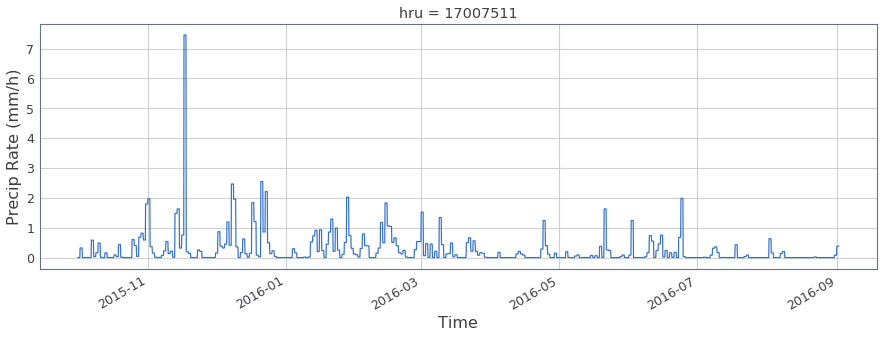

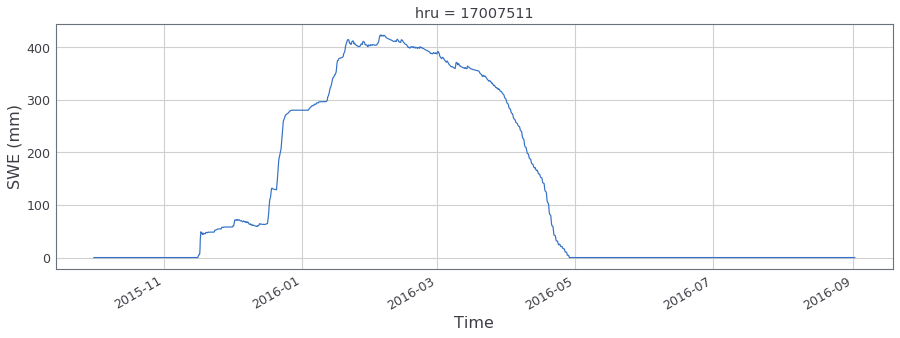

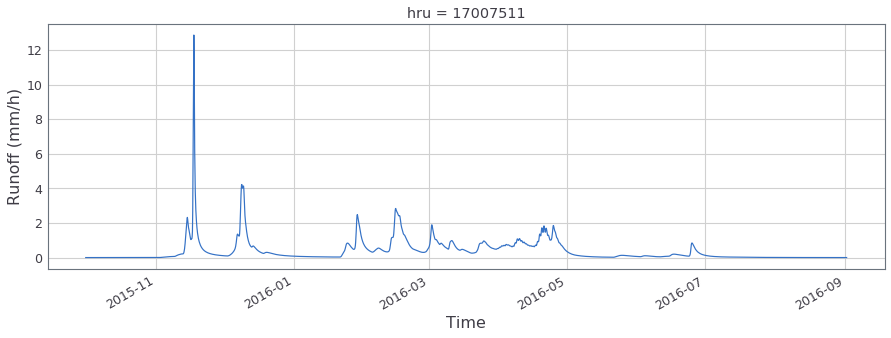

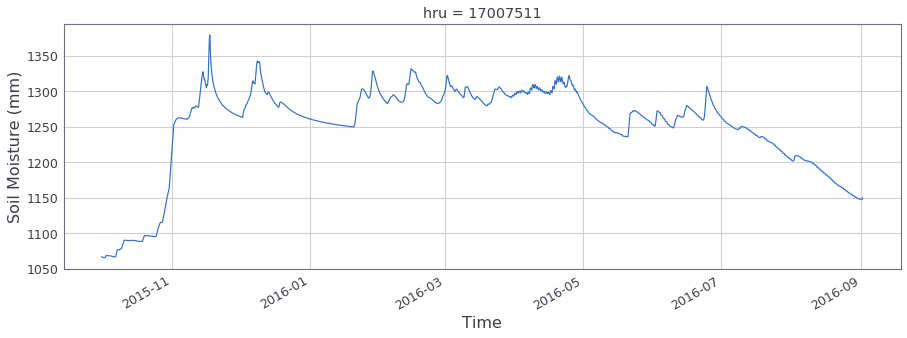

In [7]:
#Plot forcing and diagnostic variables


# PPTRATE
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['pptrate'].loc[starttime1:endtime1].plot()
plt.ylabel('Precip Rate (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/pptrate.png', bbox_inches='tight', dpi=300)
plt.show()

# SWE
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarSWE'].loc[starttime1:endtime1].plot()
plt.ylabel('SWE (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/swe.png', bbox_inches='tight', dpi=300)
plt.show()

#averageInstantRunoff
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['averageInstantRunoff'].loc[starttime1:endtime1].plot()
plt.ylabel('Runoff (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/runoff.png', bbox_inches='tight', dpi=300)
plt.show()

#scalarTotalSoilWat
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarTotalSoilWat'].loc[starttime1:endtime1].plot()
plt.ylabel('Soil Moisture (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/sm.png', bbox_inches='tight', dpi=300)
plt.show()



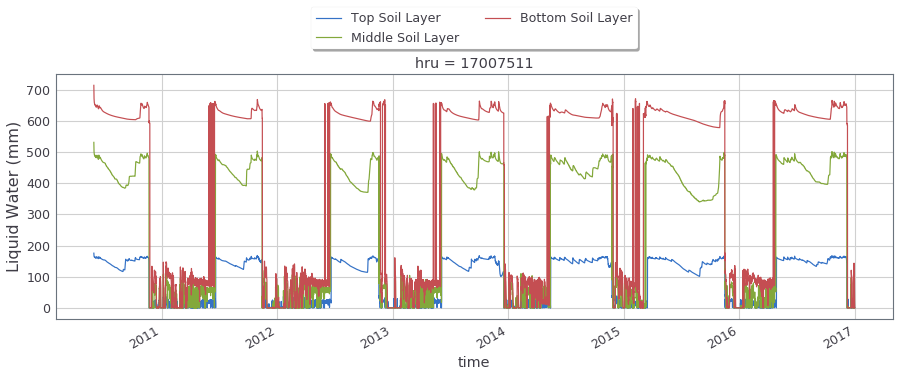

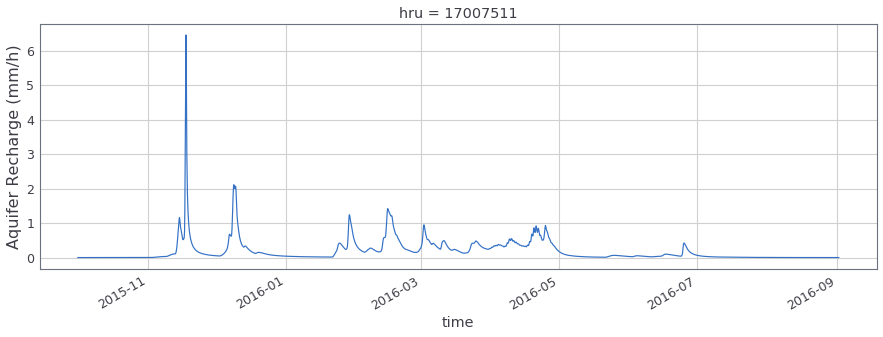

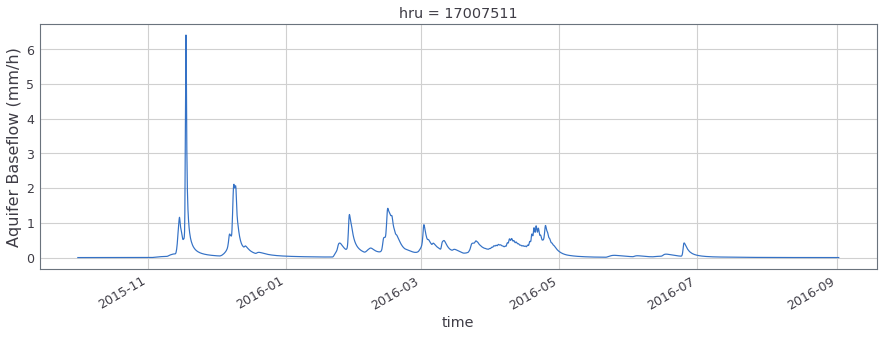

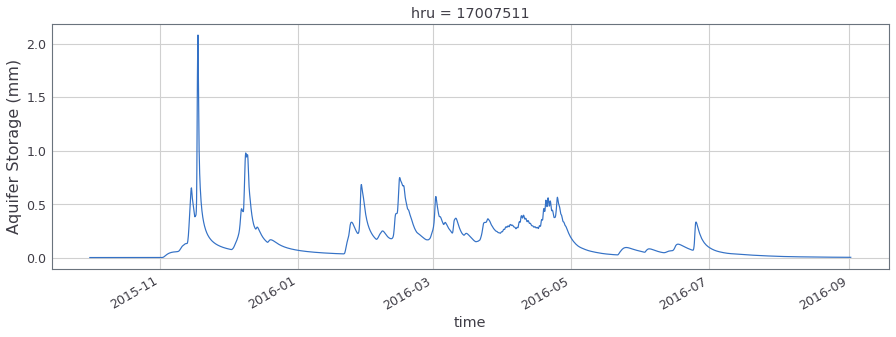

In [8]:
#mLayerVolFracLiq
iden_water = 1000
plt.figure(figsize=(pltwidth, pltheight))
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).plot(label='Top Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).plot(label='Middle Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.ylabel('Liquid Water (mm)', fontsize=16) 
plt.show()


plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferRecharge'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Recharge (mm/h)', fontsize=16)
plt.show()


plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferBaseflow'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Baseflow (mm/h)', fontsize=16)
plt.show()

plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferStorage'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Storage (mm)', fontsize=16)
plt.show()
